In [1]:
""" Auto Encoder Example.
Using an auto encoder on MNIST handwritten digits.
References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
"""

' Auto Encoder Example.\nUsing an auto encoder on MNIST handwritten digits.\nReferences:\n    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based\n    learning applied to document recognition." Proceedings of the IEEE,\n    86(11):2278-2324, November 1998.\nLinks:\n    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/\n'

In [2]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tb_graph_jupyter import show_graph
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)


# dense_test = tf.layers.dense
from l0_dense import l0_dense as dense_test
from l0_regularization import l0_regularizer

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
reg_const = 1e-6 # ~ 1e3/n == 1e5-1e6 for MNIST



# Test1: Small Test with Dense Layer

In [5]:
# build a graph with tf.layers.dense
from l0_regularization import l0_regularizer

tf.reset_default_graph()
g = tf.Graph()
with g.as_default(): 
    X = tf.placeholder("float", [None, n_input])
    y = dense_test(X, n_hidden_1, kernel_regularizer=l0_regularizer)
    #y = dense_test(X, n_hidden_1, 
    #               kernel_regularizer=tf.contrib.layers.l1_regularizer)    
    print(y) # debug
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    print(reg_losses)
tf.summary.FileWriter("logs", g).close()

Tensor("dense/BiasAdd:0", shape=(?, 256), dtype=float32)
[<function l0_regularizer.<locals>.l0 at 0x7fd186c8ea60>]


In [ ]:
show_graph(g)        

# Test2: Autoencoder 

In [4]:
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = dense_test(x, n_hidden_1, 
                         kernel_regularizer=regularizer)
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = dense_test(layer_1, n_hidden_2, kernel_regularizer=regularizer)
    return layer_2

# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = dense_test(x, n_hidden_1, kernel_regularizer=regularizer)
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = dense_test(layer_1, n_input, kernel_regularizer=regularizer)
    return layer_2

In [5]:
# tf Graph input (only pictures)
tf.reset_default_graph()
regularizer = l0_regularizer(scale=0.1)
#egularizer = tf.contrib.layers.l1_regularizer(scale=0.1)

g = tf.Graph()
with g.as_default():    
    X = tf.placeholder("float", [None, n_input])
    is_training = tf.placeholder(tf.bool, [], name='is_training')    
    # Construct model
    with tf.variable_scope('encoder'):
        encoder_op = encoder(X)    
    
    with tf.variable_scope('decoder'):
        decoder_op = decoder(encoder_op)

    # Prediction
    y_pred = decoder_op
    # Targets (Labels) are the input data.
    y_true = X

    # Define loss and optimizer, minimize the squared error
    losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    print(losses)
    
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) + tf.reduce_sum(losses)
    optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()
    # Launch the graph
    # Using InteractiveSession (more convenient while using Notebooks)
    sess = tf.InteractiveSession()
    sess.run(init)
tf.summary.FileWriter("logs", g).close()

[<tf.Variable 'encoder/l0_dense/mask:0' shape=(784, 256) dtype=float32_ref>]
[]


IndexError: list index out of range

In [14]:
tf.reset_default_graph()
X = tf.placeholder("float", [None, n_input])
is_training = tf.placeholder(tf.bool, [], name='is_training')
# Construct model
with tf.variable_scope('encoder'):
    encoder_op = encoder(X)    

with tf.variable_scope('decoder'):
    decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) + tf.reduce_sum(losses)
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# collect variables to observe:

# Initializing the variables
'''
init = tf.global_variables_initializer()
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs, is_training: True})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))
#W_to_check.eval()
print("Optimization Finished!")
'''

[<tf.Variable 'encoder/l0_dense/kernel/Regularizer/l0_regularizer/mask:0' shape=(784, 256) dtype=float32_ref>]
[<tf.Variable 'encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/mask:0' shape=(256, 128) dtype=float32_ref>]
[<tf.Variable 'decoder/l0_dense/kernel/Regularizer/l0_regularizer/mask:0' shape=(128, 256) dtype=float32_ref>]
[<tf.Variable 'decoder/l0_dense_1/kernel/Regularizer/l0_regularizer/mask:0' shape=(256, 784) dtype=float32_ref>]


'\ninit = tf.global_variables_initializer()\n# Launch the graph\n# Using InteractiveSession (more convenient while using Notebooks)\nsess = tf.InteractiveSession()\nsess.run(init)\n\ntotal_batch = int(mnist.train.num_examples/batch_size)\n# Training cycle\nfor epoch in range(training_epochs):\n    # Loop over all batches\n    for i in range(total_batch):\n        batch_xs, batch_ys = mnist.train.next_batch(batch_size)\n        # Run optimization op (backprop) and cost op (to get loss value)\n        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs, is_training: True})\n    # Display logs per epoch step\n    if epoch % display_step == 0:\n        print("Epoch:", \'%04d\' % (epoch+1),\n              "cost=", "{:.9f}".format(c))\n#W_to_check.eval()\nprint("Optimization Finished!")\n'

In [15]:
regularized_weights = [name for name in tmp if 'masked_kernel' in name and 'grad' not in name]
W_to_check = tf.get_default_graph().get_tensor_by_name(tmp2[0]+':0')

NameError: name 'tmp' is not defined

In [16]:
print(tf.trainable_variables())

[<tf.Variable 'encoder/l0_dense/kernel:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'encoder/l0_dense/kernel/Regularizer/l0_regularizer/mask:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'encoder/l0_dense/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'encoder/l0_dense_1/kernel:0' shape=(256, 128) dtype=float32_ref>, <tf.Variable 'encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/mask:0' shape=(256, 128) dtype=float32_ref>, <tf.Variable 'encoder/l0_dense_1/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'decoder/l0_dense/kernel:0' shape=(128, 256) dtype=float32_ref>, <tf.Variable 'decoder/l0_dense/kernel/Regularizer/l0_regularizer/mask:0' shape=(128, 256) dtype=float32_ref>, <tf.Variable 'decoder/l0_dense/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'decoder/l0_dense_1/kernel:0' shape=(256, 784) dtype=float32_ref>, <tf.Variable 'decoder/l0_dense_1/kernel/Regularizer/l0_regularizer/mask:0' shape=(256, 784) dtype=float32_ref>, <tf.Variable 'decoder

In [17]:
	 [[Node: encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node/read = Identity[T=DT_FLOAT, _class=["loc:@encoder/l0_dense_1/kernel"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node)]]

SyntaxError: invalid syntax (<ipython-input-17-36131992b8b8>, line 1)

## Stupid Graph Construction with the old l0_regularization

In [24]:
# tf Graph input (only pictures)
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():    
    X = tf.placeholder("float", [None, n_input])
    is_training = tf.placeholder(tf.bool, [], name='is_training')

    weights = {
        'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
        'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
        'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    }
    biases = {
        'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'decoder_b2': tf.Variable(tf.random_normal([n_input])),
    }

    # Building the encoder
    def encoder(x):
        # Encoder Hidden layer with sigmoid activation #1
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                       biases['encoder_b1']))
        # Decoder Hidden layer with sigmoid activation #2
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                       biases['encoder_b2']))
        return layer_2


    # Building the decoder
    def decoder(x):
        # Encoder Hidden layer with sigmoid activation #1
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                       biases['decoder_b1']))
        # Decoder Hidden layer with sigmoid activation #2
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                       biases['decoder_b2']))
        return layer_2

    # Construct model
    with tf.variable_scope('encoder'):
        encoder_op = encoder(X)    
        add_loss, encoder_op = l0_regularizer(encoder_op, n_hidden_2, reg_const=reg_const)# l0_regularization on layer
        encoder_op = encoder_op(is_training)
        print(encoder_op)                
    
    with tf.variable_scope('decoder'):
        decoder_op = decoder(encoder_op)

    # Prediction
    y_pred = decoder_op
    # Targets (Labels) are the input data.
    y_true = X

    # Define loss and optimizer, minimize the squared error
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) + add_loss
    optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()
    # Launch the graph
    # Using InteractiveSession (more convenient while using Notebooks)
    sess = tf.InteractiveSession()
    sess.run(init)
tf.summary.FileWriter("logs", g).close()


Tensor("encoder/cond/Merge:0", shape=(?, 128), dtype=float32)


# Built Graph

In [18]:
show_graph(g)

# Training

FailedPreconditionError: Attempting to use uninitialized value encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node
	 [[Node: encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node/read = Identity[T=DT_FLOAT, _class=["loc:@encoder/l0_dense_1/kernel"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node)]]

Caused by op 'encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node/read', defined at:
  File "/is/sg/klee/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/is/sg/klee/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-9ea6362589e7>", line 22, in <module>
    encoder_op = encoder(X)
  File "<ipython-input-16-9ea6362589e7>", line 9, in encoder
    layer_2 = dense_test(layer_1, n_hidden_2, kernel_regularizer=regularizer)
  File "/is/sg/klee/3_research/6_L0_regularization/prototype_with_mlp/l0_dense.py", line 155, in l0_dense
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 825, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 696, in __call__
    self.build(input_shapes)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/core.py", line 138, in build
    trainable=True)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 574, in add_variable
    regularization = regularizer(variable)
  File "/is/sg/klee/3_research/6_L0_regularization/prototype_with_mlp/l0_regularization.py", line 120, in l0
    l0_loss, debug = l0_computation(weights)
  File "/is/sg/klee/3_research/6_L0_regularization/prototype_with_mlp/l0_regularization.py", line 70, in l0_computation
    dtype=tf.float32)  # todo, use tf.get_variable the parameter to tune
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 235, in __init__
    constraint=constraint)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 391, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3053, in identity
    "Identity", input=input, name=name)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/is/sg/klee/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node
	 [[Node: encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node/read = Identity[T=DT_FLOAT, _class=["loc:@encoder/l0_dense_1/kernel"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](encoder/l0_dense_1/kernel/Regularizer/l0_regularizer/gating_node)]]


/is/sg/klee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


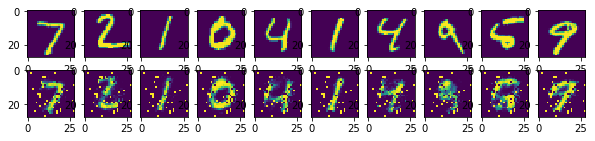

In [23]:
# Applying encode and decode over test set
encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show], is_training: False})
encoded_training = sess.run(encoder_op, 
                            feed_dict={X: mnist.test.images[:examples_to_show], is_training: True})
encoded_pred= sess.run(encoder_op, 
                       feed_dict={X: mnist.test.images[:examples_to_show], is_training: False})
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    
f.show()
plt.show()

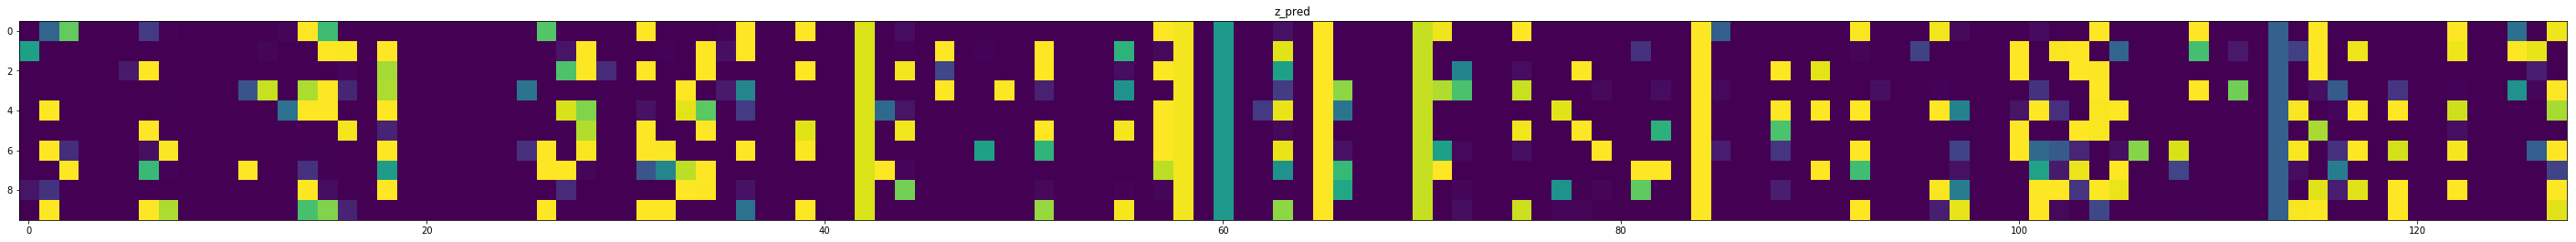

In [24]:
# latents for prediction
fig = plt.figure(figsize=(50, 300))
plt.imshow(encoded_pred)
plt.title('z_pred')

In [26]:
print(encoded_pred)

[[3.0209529e-10 3.2782665e-01 7.5923550e-01 ... 3.6613759e-01
  6.9156435e-08 9.7626698e-01]
 [5.6903321e-01 2.4424337e-13 1.0933258e-03 ... 9.9972469e-01
  9.6315354e-01 3.0490180e-13]
 [6.0831622e-04 8.1440593e-10 1.0306858e-05 ... 1.2387217e-07
  8.1487641e-02 1.5385056e-10]
 ...
 [8.3744157e-11 1.4638298e-04 9.9747425e-01 ... 5.2440834e-07
  1.4270186e-05 2.0670490e-01]
 [5.7324193e-02 1.4510548e-01 3.7188774e-03 ... 3.5786054e-03
  1.3474940e-11 9.9999845e-01]
 [1.1068476e-09 9.9849379e-01 8.7623669e-10 ... 8.0136012e-04
  5.2548012e-07 9.5546615e-01]]


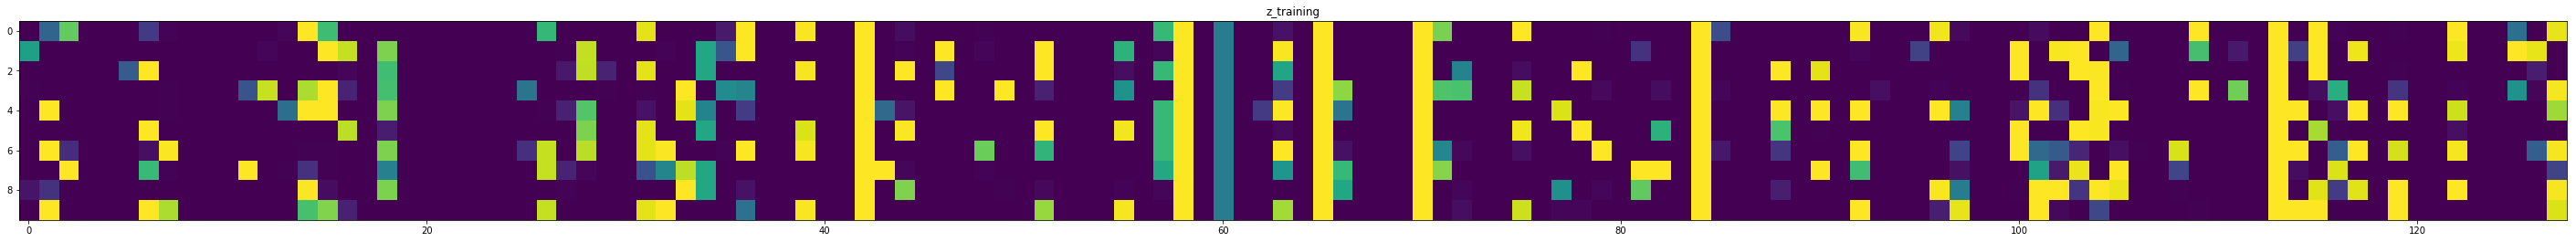

In [25]:
# latents for training
fig2 = plt.figure(figsize=(50, 300))
plt.imshow(encoded_training)
plt.title('z_training')

In [29]:
np.sum(encoded_pred - encoded_pred)

0.0